In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import os
from tqdm import tqdm
from scipy.optimize import curve_fit
from scipy.stats import pearsonr, spearmanr

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.mediation import Mediation

In [2]:
def lin_func(x, a, b):
    return a * x + b


def quadratic(x, a, k, b):
    return a * (x - k) ** 2 + b


def exp_func(x, a, b):
    return np.exp(a * x + b)


def log_func(x, a, b, c):
    return a * np.log(b * x + c)


def mi_func(x, a, b, c):
    return a * (x ** b) + c

In [3]:
df_ = pd.read_csv("./data/level_1_field.csv", index_col=0).V3

In [4]:
%%time
field_df = pd.read_csv(os.path.join("./data", "level_1_field.csv"))

k = {50, 76, 72, 138, 146, 189, 196, 219, 233, 244, 253, 266}

Names = []
Ref_as = []
D_val = []
DinN_s = []
DinO_s = []
Nk_val = []
D_N_s = []
Num_s = []

kt = 0

for idx, row in tqdm(field_df.iloc[:].iterrows()):

    if idx in k:
        continue

    id = row["V1"]
    nm = row['V3'].replace(' ', '_')

    #print(nm, idx, int(idx * 100 / len(field_df)))

    df = pd.read_csv(os.path.join("./data", 'age_kw', nm + '_age_kw_stacked.csv'))
    df = df[(df['time'] > 1970 - kt) & (df['time'] < 2015 - kt)]
    df = df[df['cite_num'] > 5]
    dval = df.dvalue.mean()
    nkval = df.new_kw.mean()
    DinN = df[df.new_kw == 1].dvalue.mean()
    DinO = df[df.new_kw == 0].dvalue.mean()
    D_N_c = pearsonr(df['dvalue'], df['new_kw']).statistic
    D_N_p = pearsonr(df['dvalue'], df['new_kw']).pvalue
    ref_a = -df['avg_ref'].mean()

    #if D_N_p < 0.05:
    if True:
        Names.append(nm)
        Ref_as.append(ref_a)
        D_val.append(dval)
        DinN_s.append(DinN)
        DinO_s.append(DinO)
        Nk_val.append(nkval)
        D_N_s.append(D_N_c)
        Num_s.append(np.log(len(df)))


284it [01:29,  3.19it/s]

CPU times: user 1min 16s, sys: 9.29 s, total: 1min 25s
Wall time: 1min 29s


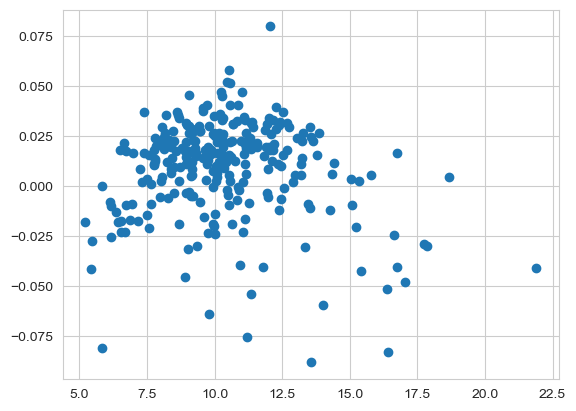

In [155]:
plt.scatter(Ref_as, D_N_s)

In [6]:
df_dt = pd.DataFrame({
    'Name': Names,
    'Ref_as': Ref_as,
    'Dval': D_val,
    'DinN': DinN_s,
    'DinO': DinO_s,
    'Nk_val': Nk_val,
    'D_N_s': D_N_s,
    'Num_s': Num_s
})
df_dt.to_csv('./df_dt_{}.csv'.format(2015 - kt))
df_dt

,Name,Ref_as,Dval,DinN,DinO,Nk_val,D_N_s,Num_s
0,quantum_electrodynamics,9.155286,0.040942,0.044664,0.040660,0.070497,0.005173,11.571911
1,mathematical_physics,11.266322,0.034703,0.031098,0.035365,0.155215,-0.008443,10.364009
2,virology,8.123299,0.013232,0.020966,0.012222,0.115445,0.024453,13.035929
3,clinical_psychology,9.981735,0.020324,0.031143,0.019020,0.107531,0.026614,12.415746
4,pediatrics,9.284764,0.025082,0.030238,0.023930,0.182534,0.015581,12.042176
...,...,...,...,...,...,...,...,...
267,computational_biology,6.705175,0.037356,0.031501,0.040574,0.354687,-0.022892,10.553388
268,chemical_engineering,9.126651,0.122563,0.127777,0.122093,0.082728,0.004774,12.329975
269,business_administration,9.776043,0.149254,0.124810,0.170667,0.466951,-0.064204,7.249215
270,industrial_engineering,9.324605,0.081488,0.085038,0.076874,0.565120,0.014794,8.878915


df_dt = pd.read_csv('./df_dt_2015.csv', index_col=0)
df_dt

In [157]:
print(pearsonr(df_dt.DinN - df_dt.DinO, df_dt.Nk_val))
print(pearsonr(df_dt.DinN, df_dt.Dval))

PearsonRResult(statistic=-0.3616462712748049, pvalue=7.934275732246179e-10)
PearsonRResult(statistic=0.9764640552827839, pvalue=6.681853722833139e-182)


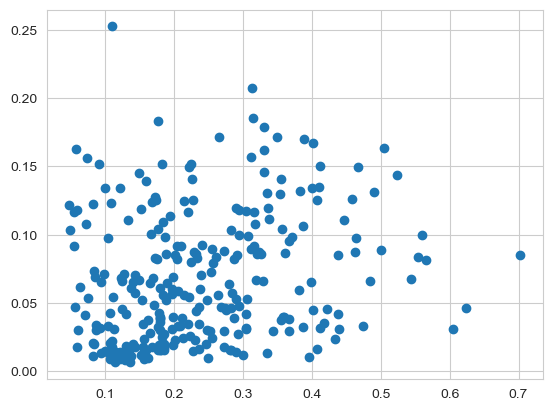

In [158]:
plt.scatter(Nk_val, D_val)

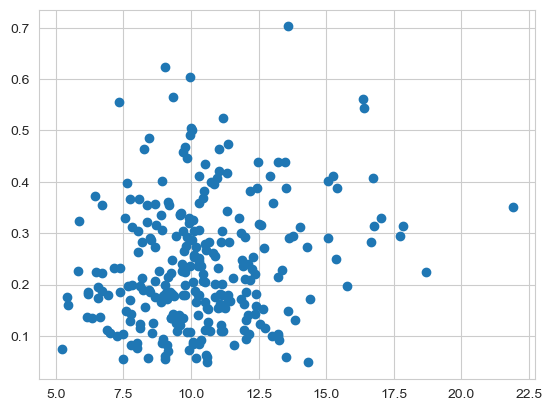

PearsonRResult(statistic=0.1935624398061622, pvalue=0.0013365943001956843) 

                            OLS Regression Results                            
Dep. Variable:                 Nk_val   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     10.51
Date:                Sun, 14 Apr 2024   Prob (F-statistic):            0.00134
Time:                        11:03:15   Log-Likelihood:                 188.44
No. Observations:                 272   AIC:                            -372.9
Df Residuals:                     270   BIC:                            -365.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [159]:
plt.scatter(Ref_as, Nk_val)
plt.show()

print(pearsonr(Ref_as, Nk_val), '\n')

df_op = df_dt
y = df_op['Nk_val']
X_cols = ['Ref_as']
X = sm.add_constant(df_op[X_cols])
mediator_model = sm.OLS(y, X)

print(mediator_model.fit().summary())

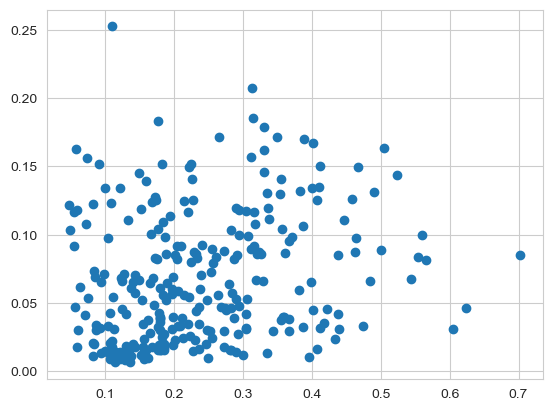

SignificanceResult(statistic=0.25975701095084636, pvalue=1.4313052329293124e-05)

In [160]:
plt.scatter(Nk_val, D_val)
plt.show()

spearmanr(Nk_val, D_val)

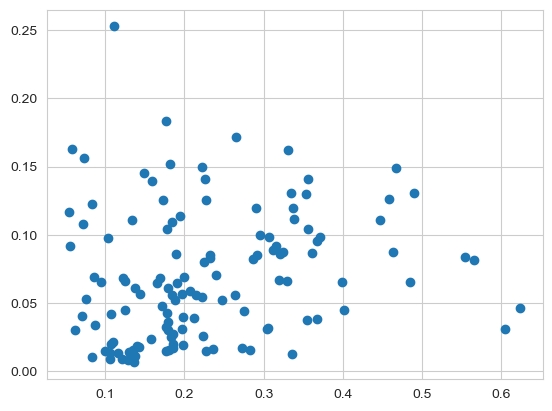

In [161]:
df_op = df_dt[df_dt['Ref_as'] < 10]
plt.scatter(df_op.Nk_val, df_op.Dval)

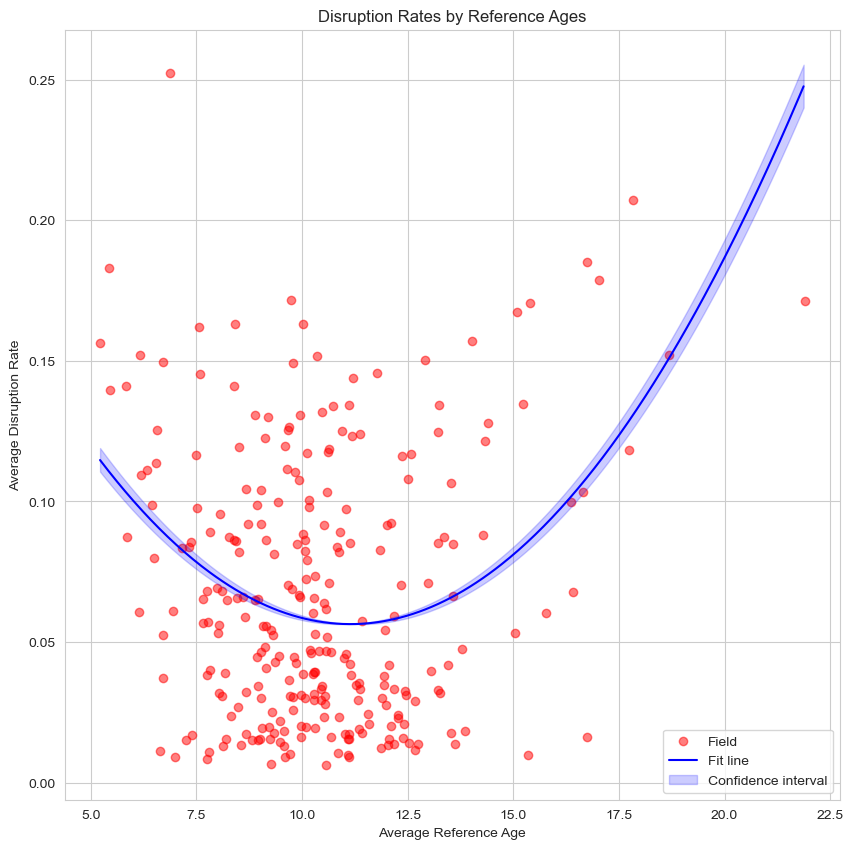

array([1.66169014e-03, 1.11433123e+01, 5.64064203e-02])

In [13]:
plt.figure(figsize=(10,10))
X, y = df_dt.Ref_as, df_dt.Dval
popt, pcov = curve_fit(quadratic, X, y)
X_r = np.arange(min(X), max(X), 0.05)
fit_line = quadratic(X_r, *popt)
upper_bound = fit_line.copy()
lower_bound = fit_line.copy()
for i in np.linspace(0, pcov[1, 1], num=50):
    popt_h = popt.copy()
    popt_h[1] += 2 * i
    fit_line_d = quadratic(X_r, *popt_h)

    upper_bound = np.max(np.array([upper_bound, fit_line_d]), axis=0)
    lower_bound = np.min(np.array([lower_bound, fit_line_d]), axis=0)

    popt_l = popt.copy()
    popt_l[1] -= 2 * i
    fit_line_d = quadratic(X_r, *popt_l)

    upper_bound = np.max(np.array([upper_bound, fit_line_d]), axis=0)
    lower_bound = np.min(np.array([lower_bound, fit_line_d]), axis=0)

plt.scatter(X, y, color='red', alpha=0.5, label='Field')
plt.plot(X_r, fit_line, color='b', label='Fit line')
plt.fill_between(X_r, lower_bound, upper_bound, color='b', alpha=0.2, label='Confidence interval')
#plt.xlim((int_s[0],int_s[-1]))
plt.ylabel("Average Disruption Rate")
plt.xlabel("Average Reference Age")
plt.title("Disruption Rates by Reference Ages")
plt.legend(loc='lower right')
plt.show()
popt

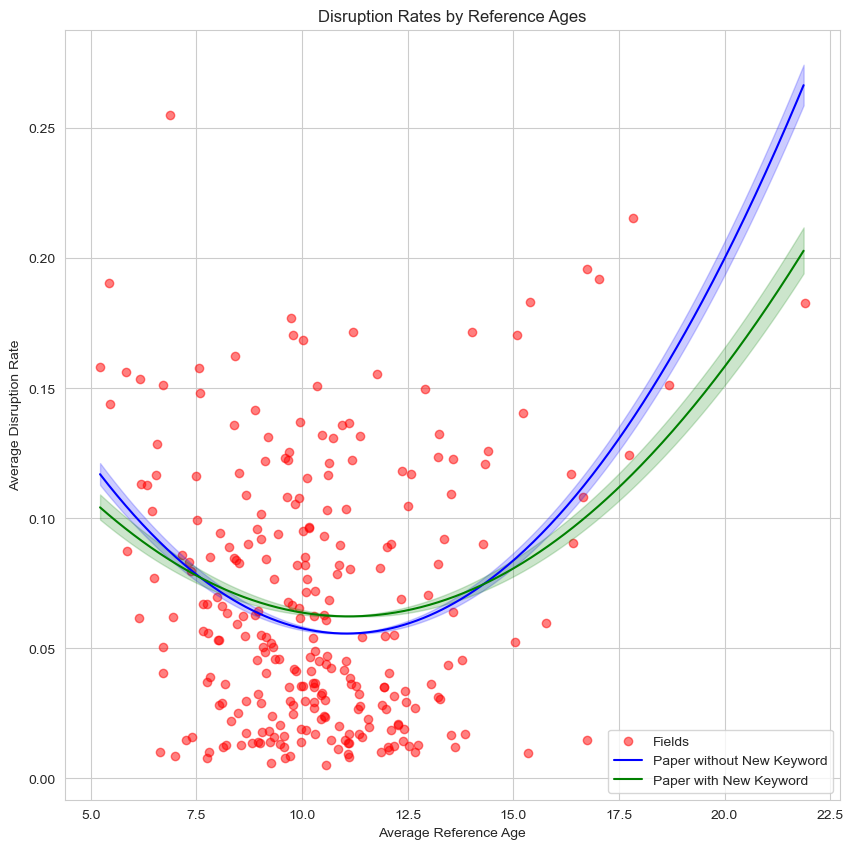

In [15]:
X, y = df_dt.Ref_as, df_dt.DinO
popt, pcov = curve_fit(quadratic, X, y)
X_r = np.arange(min(X), max(X), 0.05)
fit_line = quadratic(X_r, *popt)
upper_bound = fit_line.copy()
lower_bound = fit_line.copy()
for i in np.linspace(0, pcov[1, 1], num=50):
    popt_h = popt.copy()
    popt_h[1] += 2 * i
    fit_line_d = quadratic(X_r, *popt_h)

    upper_bound = np.max(np.array([upper_bound, fit_line_d]), axis=0)
    lower_bound = np.min(np.array([lower_bound, fit_line_d]), axis=0)

    popt_l = popt.copy()
    popt_l[1] -= 2 * i
    fit_line_d = quadratic(X_r, *popt_l)

    upper_bound = np.max(np.array([upper_bound, fit_line_d]), axis=0)
    lower_bound = np.min(np.array([lower_bound, fit_line_d]), axis=0)
plt.figure(figsize=(10,10))
plt.scatter(X, y, color='red', alpha=0.5, label="Fields")

plt.plot(X_r, fit_line, color='b', label="Paper without New Keyword")
plt.fill_between(X_r, lower_bound, upper_bound, color='b', alpha=0.2)
#plt.xlim((int_s[0],int_s[-1]))

X, y = df_dt.Ref_as, df_dt.DinN
popt, pcov = curve_fit(quadratic, X, y)
X_r = np.arange(min(X), max(X), 0.05)
fit_line = quadratic(X_r, *popt)
upper_bound = fit_line.copy()
lower_bound = fit_line.copy()
for i in np.linspace(0, pcov[1, 1], num=50):
    popt_h = popt.copy()
    popt_h[1] += 2 * i
    fit_line_d = quadratic(X_r, *popt_h)

    upper_bound = np.max(np.array([upper_bound, fit_line_d]), axis=0)
    lower_bound = np.min(np.array([lower_bound, fit_line_d]), axis=0)

    popt_l = popt.copy()
    popt_l[1] -= 2 * i
    fit_line_d = quadratic(X_r, *popt_l)

    upper_bound = np.max(np.array([upper_bound, fit_line_d]), axis=0)
    lower_bound = np.min(np.array([lower_bound, fit_line_d]), axis=0)

plt.plot(X_r, fit_line, label='Paper with New Keyword', color='g')
plt.fill_between(X_r, lower_bound, upper_bound, color='g', alpha=0.2)
#plt.xlim((int_s[0],int_s[-1]))
plt.ylabel("Average Disruption Rate")
plt.xlabel("Average Reference Age")
plt.title("Disruption Rates by Reference Ages")
plt.legend(loc='lower right')
plt.show()
plt.show()

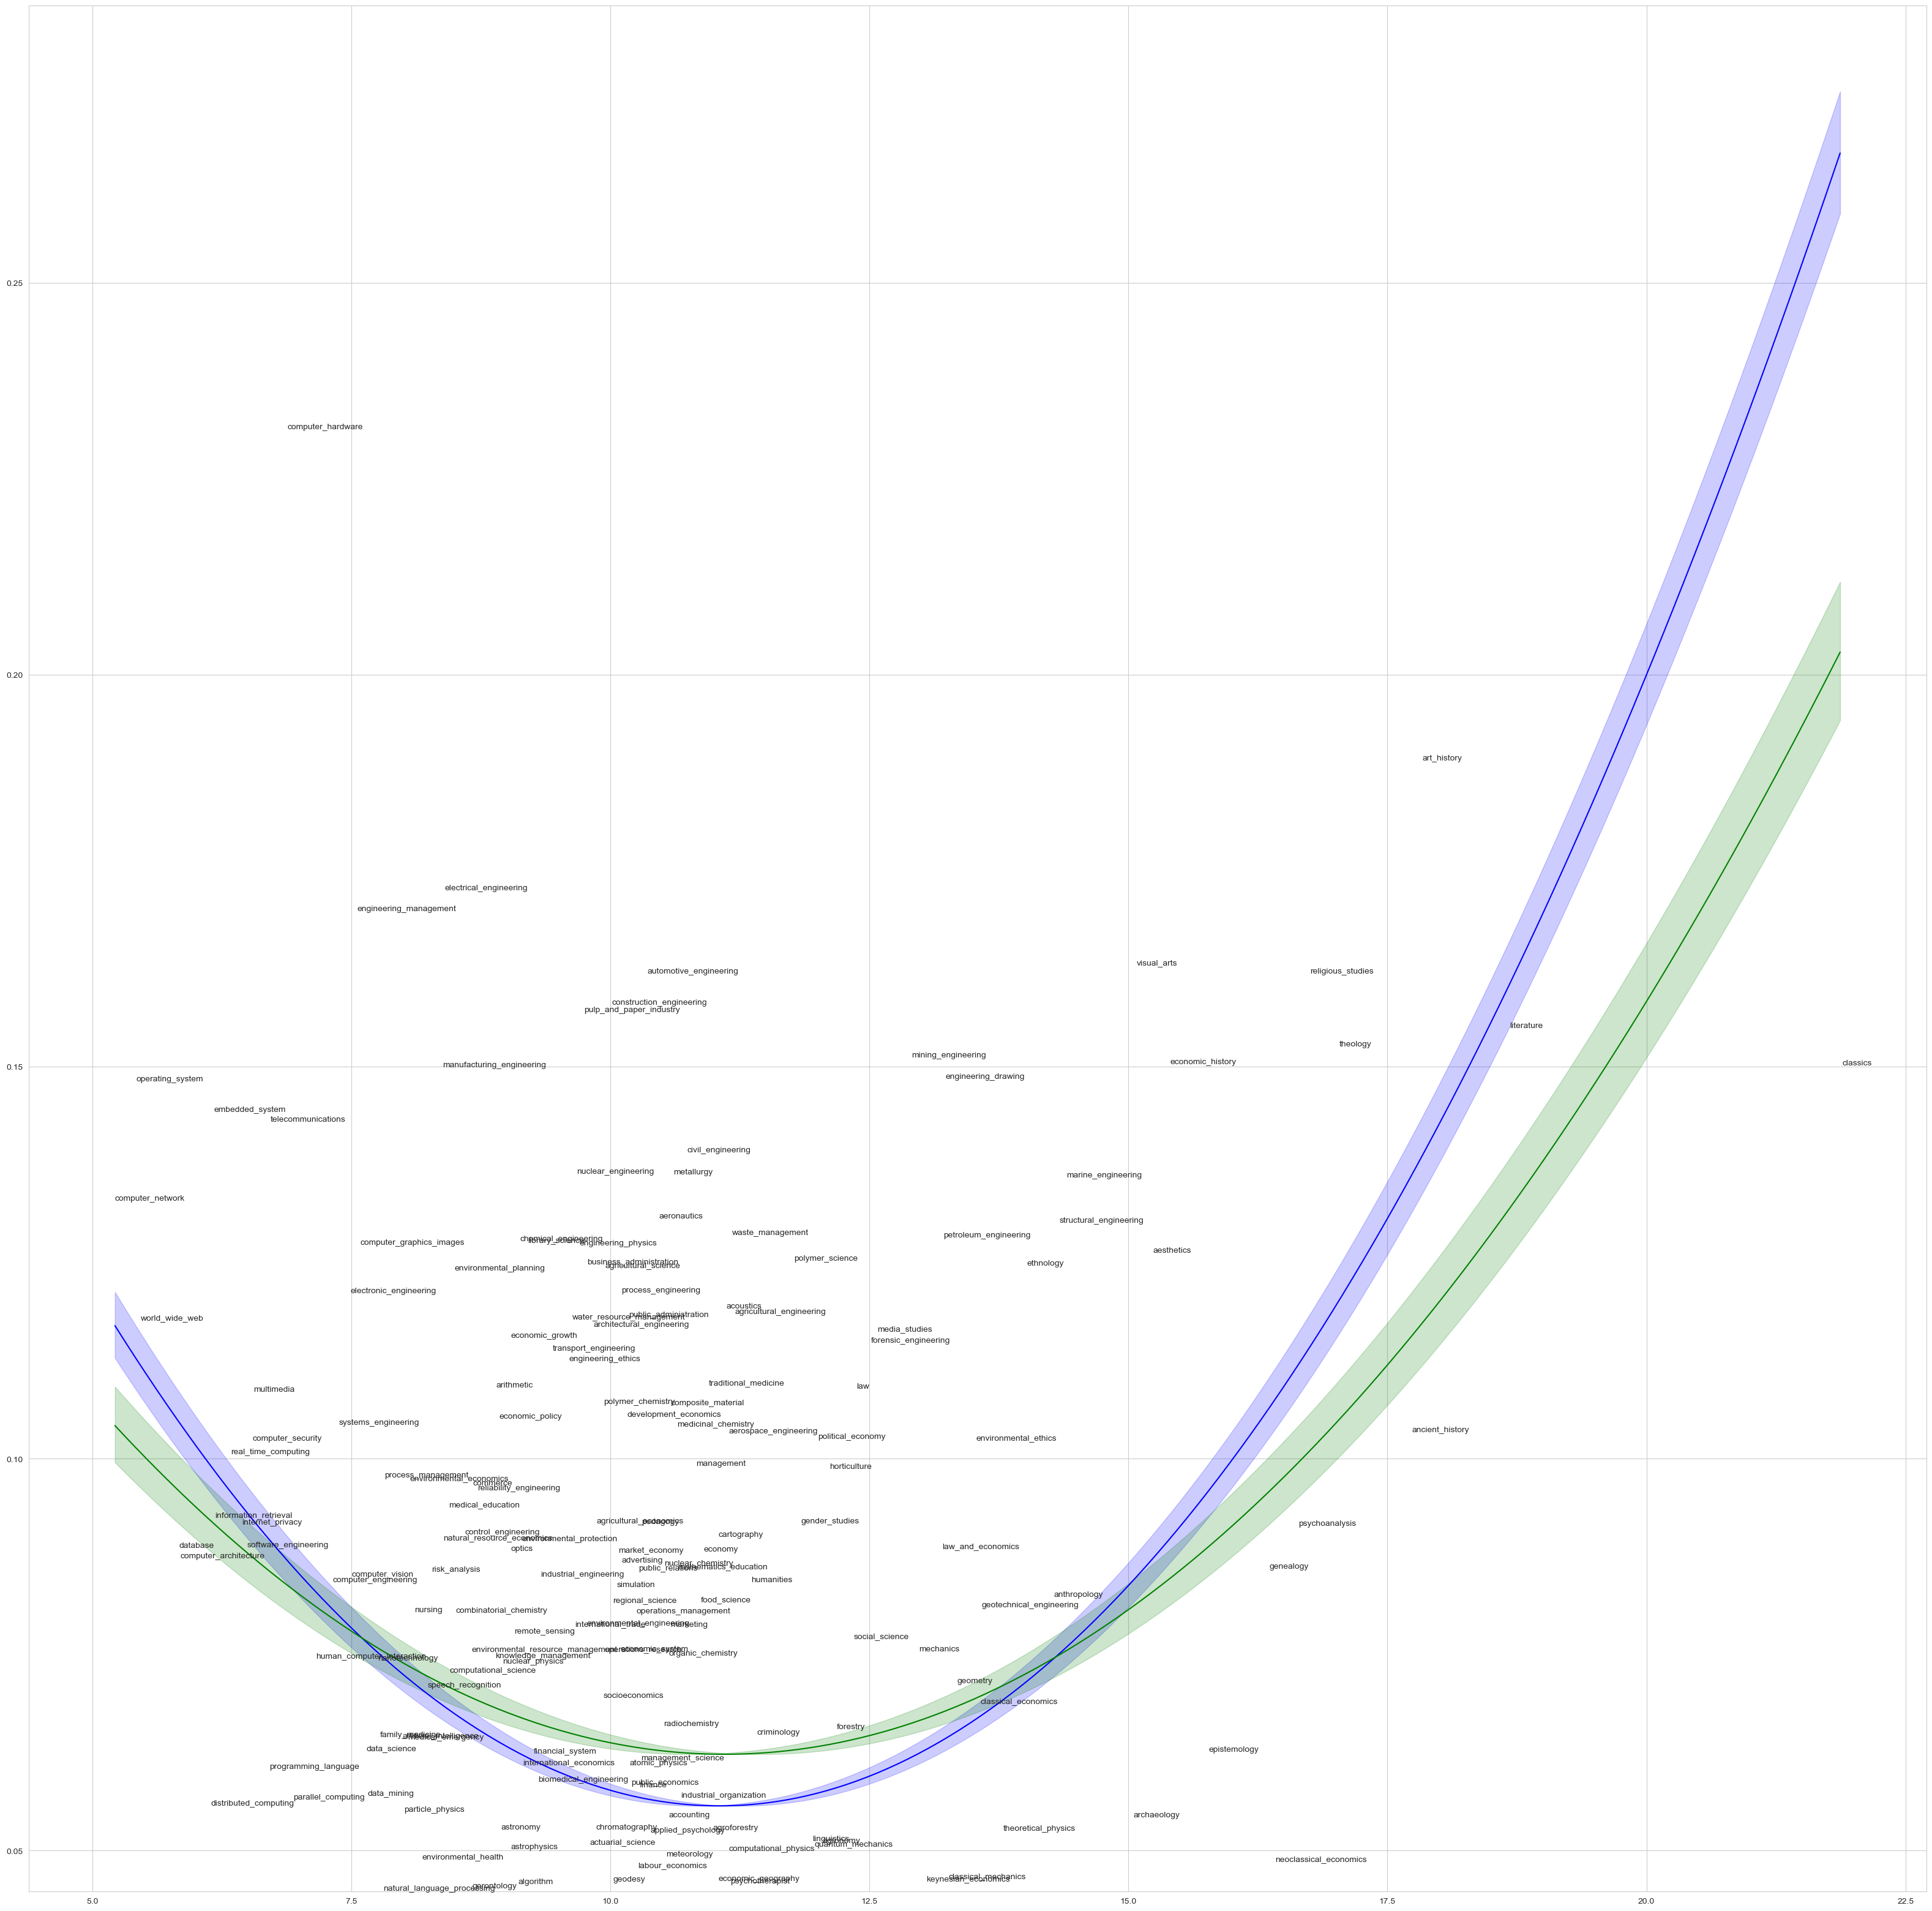

In [164]:
plt.figure(figsize=(40, 40))

X, y = df_dt.Ref_as, df_dt.DinO
popt, pcov = curve_fit(quadratic, X, y)
X_r = np.arange(min(X), max(X), 0.05)
fit_line = quadratic(X_r, *popt)
upper_bound = fit_line.copy()
lower_bound = fit_line.copy()
for i in np.linspace(0, pcov[1, 1], num=50):
    popt_h = popt.copy()
    popt_h[1] += 2 * i
    fit_line_d = quadratic(X_r, *popt_h)

    upper_bound = np.max(np.array([upper_bound, fit_line_d]), axis=0)
    lower_bound = np.min(np.array([lower_bound, fit_line_d]), axis=0)

    popt_l = popt.copy()
    popt_l[1] -= 2 * i
    fit_line_d = quadratic(X_r, *popt_l)

    upper_bound = np.max(np.array([upper_bound, fit_line_d]), axis=0)
    lower_bound = np.min(np.array([lower_bound, fit_line_d]), axis=0)

plt.plot(X_r, fit_line, label='Fit', color='b')
plt.fill_between(X_r, lower_bound, upper_bound, color='b', alpha=0.2)

X, y = df_dt.Ref_as, df_dt.DinN
popt, pcov = curve_fit(quadratic, X, y)
X_r = np.arange(min(X), max(X), 0.05)
fit_line = quadratic(X_r, *popt)
upper_bound = fit_line.copy()
lower_bound = fit_line.copy()
for i in np.linspace(0, pcov[1, 1], num=50):
    popt_h = popt.copy()
    popt_h[1] += 2 * i
    fit_line_d = quadratic(X_r, *popt_h)

    upper_bound = np.max(np.array([upper_bound, fit_line_d]), axis=0)
    lower_bound = np.min(np.array([lower_bound, fit_line_d]), axis=0)

    popt_l = popt.copy()
    popt_l[1] -= 2 * i
    fit_line_d = quadratic(X_r, *popt_l)

    upper_bound = np.max(np.array([upper_bound, fit_line_d]), axis=0)
    lower_bound = np.min(np.array([lower_bound, fit_line_d]), axis=0)

for i in range(len(df_dt)):
    plt.annotate(df_dt.Name.iloc[i], xy=(X[i], y[i]), xytext=(X[i], y[i]))

plt.plot(X_r, fit_line, label='Fit', color='g')
plt.fill_between(X_r, lower_bound, upper_bound, color='g', alpha=0.2)
#plt.xlim((int_s[0],int_s[-1]))
plt.show()

In [ ]:
plt.figure(figsize=(40, 40))

X, y = df_dt.Ref_as, df_dt.DinO
popt, pcov = curve_fit(quadratic, X, y)
X_r = np.arange(min(X), max(X), 0.05)
fit_line = quadratic(X_r, *popt)
upper_bound = fit_line.copy()
lower_bound = fit_line.copy()
for i in np.linspace(0, pcov[1, 1], num=50):
    popt_h = popt.copy()
    popt_h[1] += 2 * i
    fit_line_d = quadratic(X_r, *popt_h)

    upper_bound = np.max(np.array([upper_bound, fit_line_d]), axis=0)
    lower_bound = np.min(np.array([lower_bound, fit_line_d]), axis=0)

    popt_l = popt.copy()
    popt_l[1] -= 2 * i
    fit_line_d = quadratic(X_r, *popt_l)

    upper_bound = np.max(np.array([upper_bound, fit_line_d]), axis=0)
    lower_bound = np.min(np.array([lower_bound, fit_line_d]), axis=0)

plt.plot(X_r, fit_line, label='Fit', color='b')
plt.fill_between(X_r, lower_bound, upper_bound, color='b', alpha=0.2)

X, y = df_dt.Ref_as, df_dt.DinN
popt, pcov = curve_fit(quadratic, X, y)
X_r = np.arange(min(X), max(X), 0.05)
fit_line = quadratic(X_r, *popt)
upper_bound = fit_line.copy()
lower_bound = fit_line.copy()
for i in np.linspace(0, pcov[1, 1], num=50):
    popt_h = popt.copy()
    popt_h[1] += 2 * i
    fit_line_d = quadratic(X_r, *popt_h)

    upper_bound = np.max(np.array([upper_bound, fit_line_d]), axis=0)
    lower_bound = np.min(np.array([lower_bound, fit_line_d]), axis=0)

    popt_l = popt.copy()
    popt_l[1] -= 2 * i
    fit_line_d = quadratic(X_r, *popt_l)

    upper_bound = np.max(np.array([upper_bound, fit_line_d]), axis=0)
    lower_bound = np.min(np.array([lower_bound, fit_line_d]), axis=0)

for i in range(len(df_dt)):
    plt.annotate(df_dt.Name.iloc[i], xy=(X[i], y[i]), xytext=(X[i], y[i]))

plt.plot(X_r, fit_line, label='Fit', color='g')
plt.fill_between(X_r, lower_bound, upper_bound, color='g', alpha=0.2)
#plt.xlim((int_s[0],int_s[-1]))
plt.show()

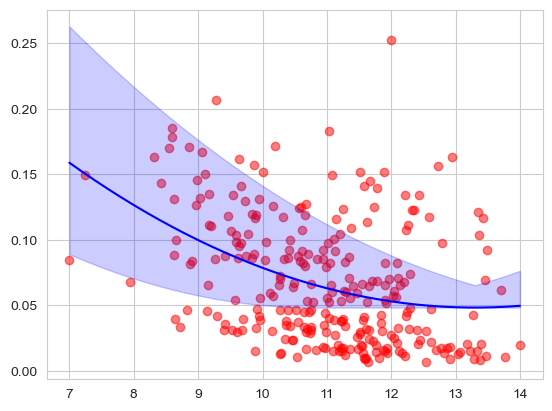

array([2.78456047e-03, 1.33013141e+01, 4.83416983e-02])

In [172]:
X, y = df_dt.Num_s, df_dt.Dval
popt, pcov = curve_fit(quadratic, X, y)
X_r = np.arange(min(X), max(X), 0.05)
fit_line = quadratic(X_r, *popt)
upper_bound = fit_line.copy()
lower_bound = fit_line.copy()
for i in np.linspace(0, pcov[1, 1], num=50):
    popt_h = popt.copy()
    popt_h[1] += 2 * i
    fit_line_d = quadratic(X_r, *popt_h)

    upper_bound = np.max(np.array([upper_bound, fit_line_d]), axis=0)
    lower_bound = np.min(np.array([lower_bound, fit_line_d]), axis=0)

    popt_l = popt.copy()
    popt_l[1] -= 2 * i
    fit_line_d = quadratic(X_r, *popt_l)

    upper_bound = np.max(np.array([upper_bound, fit_line_d]), axis=0)
    lower_bound = np.min(np.array([lower_bound, fit_line_d]), axis=0)

plt.scatter(X, y, color='red', alpha=0.5)
plt.plot(X_r, fit_line, label='Fit', color='b')
plt.fill_between(X_r, lower_bound, upper_bound, color='b', alpha=0.2)
#plt.xlim((int_s[0],int_s[-1]))

plt.show()
popt

In [173]:
df_dt

,Name,Ref_as,Dval,DinN,DinO,Nk_val,D_N_s,Num_s,Abs,extremeness
0,quantum_electrodynamics,9.155286,0.040942,0.044664,0.040660,0.070497,0.005173,11.571911,2.416625,0.063535
1,mathematical_physics,11.266322,0.034703,0.031098,0.035365,0.155215,-0.008443,10.364009,0.902313,0.058650
2,virology,8.123299,0.013232,0.020966,0.012222,0.115445,0.024453,13.035929,4.912630,0.081397
3,clinical_psychology,9.981735,0.020324,0.031143,0.019020,0.107531,0.026614,12.415746,2.434011,0.063617
4,pediatrics,9.284764,0.025082,0.030238,0.023930,0.182534,0.015581,12.042176,2.757413,0.065252
...,...,...,...,...,...,...,...,...,...,...
267,computational_biology,6.705175,0.037356,0.031501,0.040574,0.354687,-0.022892,10.553388,3.848213,0.072283
268,chemical_engineering,9.126651,0.122563,0.127777,0.122093,0.082728,0.004774,12.329975,3.203323,0.067844
269,business_administration,9.776043,0.149254,0.124810,0.170667,0.466951,-0.064204,7.249215,2.526828,0.064065
270,industrial_engineering,9.324605,0.081488,0.085038,0.076874,0.565120,0.014794,8.878915,0.445690,0.058056


In [189]:
df_op = df_dt.copy()
model = smf.ols('Dval ~ Ref_as + np.power(Ref_as, 2) + Num_s', data=df_op).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Dval   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     31.18
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           2.55e-17
Time:                        11:47:46   Log-Likelihood:                 483.83
No. Observations:                 272   AIC:                            -959.7
Df Residuals:                     268   BIC:                            -945.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4069    

In [134]:
df_dt

,Name,Ref_as,Dval,DinN,DinO,Nk_val,D_N_s,Num_s
0,quantum_electrodynamics,9.155286,0.040942,0.044664,0.040660,0.070497,0.005173,11.571911
1,mathematical_physics,11.266322,0.034703,0.031098,0.035365,0.155215,-0.008443,10.364009
2,virology,8.123299,0.013232,0.020966,0.012222,0.115445,0.024453,13.035929
3,clinical_psychology,9.981735,0.020324,0.031143,0.019020,0.107531,0.026614,12.415746
4,pediatrics,9.284764,0.025082,0.030238,0.023930,0.182534,0.015581,12.042176
...,...,...,...,...,...,...,...,...
267,computational_biology,6.705175,0.037356,0.031501,0.040574,0.354687,-0.022892,10.553388
268,chemical_engineering,9.126651,0.122563,0.127777,0.122093,0.082728,0.004774,12.329975
269,business_administration,9.776043,0.149254,0.124810,0.170667,0.466951,-0.064204,7.249215
270,industrial_engineering,9.324605,0.081488,0.085038,0.076874,0.565120,0.014794,8.878915


In [133]:
df_dt[df_dt.Name == 'sociology']

,Name,Ref_as,Dval,DinN,DinO,Nk_val,D_N_s,Num_s


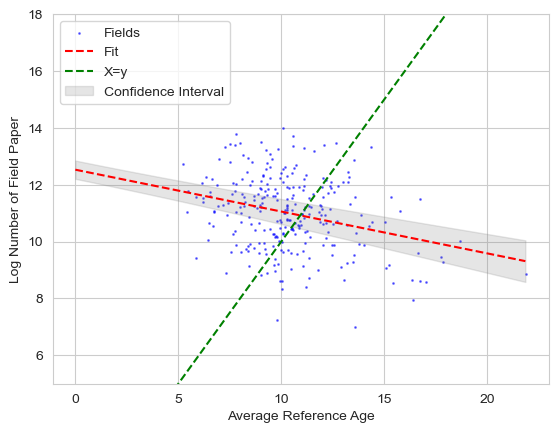

10.9

In [16]:
X, y = df_dt.Ref_as, df_dt.Num_s
popt, pcov = curve_fit(lin_func, X, y)
X_r = np.arange(0, max(X), 0.05)
fit_line = lin_func(X_r, *popt)
sigma = np.sqrt(np.diag(pcov)[0] * X_r ** 2 + np.diag(pcov)[1])
upper_bound = fit_line + sigma
lower_bound = fit_line - sigma

plt.scatter(X, y, label='Fields', color='blue', alpha=0.5, s=1)
plt.plot(X_r, fit_line, 'r--', label='Fit')
plt.plot(X_r, X_r, 'g--', label='X=y')
plt.fill_between(X_r, lower_bound, upper_bound, color='gray', alpha=0.2, label='Confidence Interval')
plt.xlabel("Average Reference Age")
plt.ylabel("Log Number of Field Paper")
plt.ylim((5, 18))

plt.legend()
plt.show()

X_r[np.abs(fit_line - X_r).argmin()]

In [166]:
len(df_dt[(df_dt.Ref_as < 13.4) & (df_dt.Ref_as > 8.2)]) / len(df_dt)

0.7205882352941176

                            OLS Regression Results                            
Dep. Variable:                   Dval   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     30.40
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           8.23e-08
Time:                        22:41:37   Log-Likelihood:                 457.62
No. Observations:                 272   AIC:                            -911.2
Df Residuals:                     270   BIC:                            -904.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0502      0.004     11.959      0.0

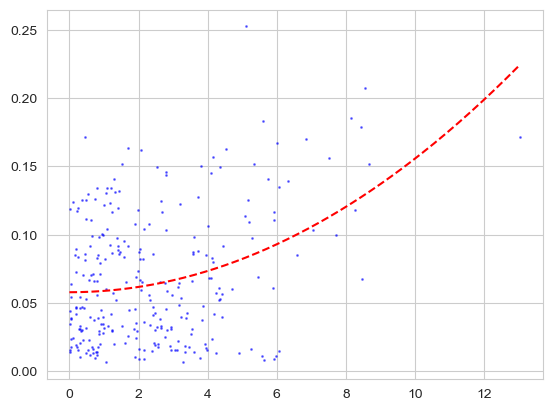

                            OLS Regression Results                            
Dep. Variable:                   Dval   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     39.29
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           1.44e-09
Time:                        22:41:37   Log-Likelihood:                 461.59
No. Observations:                 272   AIC:                            -919.2
Df Residuals:                     270   BIC:                            -912.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -2.1e-08      0.011  -1.89e-06      1.0

'df_sp.ext_2 = (df_sp.ext_2 - df_sp.ext_2.mean()) / df_sp.ext_2.std()\ndf_sp.Nk = (df_sp.Nk - df_sp.Nk.mean()) / df_sp.Nk.std()\ndf_sp.dval = (df_sp.dval - df_sp.dval.mean()) / df_sp.dval.std()'

In [18]:
df_dt['Abs'] = (df_dt['Ref_as'] - df_dt['Num_s']).apply(np.abs)
y = df_dt['Dval']
X_cols = ['Abs']
X = sm.add_constant(df_dt[X_cols])
mediator_model = sm.OLS(y, X)

print(mediator_model.fit().summary())
X = (df_dt['Abs'])
y = (df_dt['Dval'])
plt.scatter(X, y, label='Fields', color='blue', alpha=0.5, s=1)

popt, pcov = curve_fit(mi_func, X, y)
X_r = np.arange(0, max(X), 0.05)
fit_line = mi_func(X_r, *popt)
plt.plot(X_r, fit_line, 'r--', label='Fit')
plt.show()

X_fit = mi_func(X, *popt)
df_dt['extremeness'] = X_fit

X = sm.add_constant(mi_func(X, *popt))
mediator_model = sm.OLS(y, X)

print(mediator_model.fit().summary())
print(popt, pcov)
ext = []
ext_2 = []
weight = []
Nk = []
dval = []
for i, row in df_dt.iterrows():
    ext.append(row['extremeness'])
    ext_2.append(np.square(row['Ref_as'] - row['Num_s']))
    weight.append(row['Nk_val'])
    Nk.append(1)
    dval.append(row['DinN'])

    ext.append(row['extremeness'])
    ext_2.append(np.square(row['Ref_as'] - row['Num_s']))
    weight.append((1 - row['Nk_val']))
    Nk.append(0)
    dval.append(row['DinO'])

df_sp = pd.DataFrame({
    'ext': ext,
    'ext_2': ext_2,
    'weight': weight,
    'Nk': Nk,
    'dval': dval,
    'cross': np.array(Nk) * np.array(ext)
})
'''df_sp.ext_2 = (df_sp.ext_2 - df_sp.ext_2.mean()) / df_sp.ext_2.std()
df_sp.Nk = (df_sp.Nk - df_sp.Nk.mean()) / df_sp.Nk.std()
df_sp.dval = (df_sp.dval - df_sp.dval.mean()) / df_sp.dval.std()'''

In [20]:
df_op = df_sp.copy()
model = smf.wls('dval ~ ext_2 + Nk + ext_2:Nk', data=df_op, weights=np.array(df_op['weight'])).fit()
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:                   dval   R-squared:                       0.137
Model:                            WLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     28.67
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           3.27e-17
Time:                        22:41:51   Log-Likelihood:                 856.68
No. Observations:                 544   AIC:                            -1705.
Df Residuals:                     540   BIC:                            -1688.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0544      0.003     21.220      0.0

In [30]:
xv, mv, yv = 'ext', 'cross', 'dval'
y = df_op[mv]
X_cols = [xv]
X = sm.add_constant(df_op[X_cols])
mediator_model = sm.WLS(y, X, weights=df_op.weight)

# For the second step of the mediation model, we can add in other predictors.
y = df_op[yv]
X_cols = [xv, mv]
X = sm.add_constant(df_op[X_cols])
outcome_model = sm.WLS(y, X, weights=df_op.weight)

med = Mediation(outcome_model=outcome_model, mediator_model=mediator_model,
                exposure='ext', mediator=mv).fit()
print("General Distribution: Structure(Exposure)-Context(Mediator)-Function(y)\n")
print(med.summary())

General Distribution: Structure(Exposure)-Context(Mediator)-Function(y)

                          Estimate  Lower CI bound  Upper CI bound  P-value
ACME (control)            0.023277       -0.015113        0.068723     0.22
ACME (treated)            0.023277       -0.015113        0.068723     0.22
ADE (control)             0.981975        0.729862        1.214037     0.00
ADE (treated)             0.981975        0.729862        1.214037     0.00
Total effect              1.005251        0.761951        1.234913     0.00
Prop. mediated (control)  0.021094       -0.014925        0.072025     0.22
Prop. mediated (treated)  0.021094       -0.014925        0.072025     0.22
ACME (average)            0.023277       -0.015113        0.068723     0.22
ADE (average)             0.981975        0.729862        1.214037     0.00
Prop. mediated (average)  0.021094       -0.014925        0.072025     0.22


In [29]:
df_op

,ext,ext_2,weight,Nk,dval,cross
0,0.063535,5.840079,0.815781,1,0.044664,0.063535
1,0.063535,5.840079,10.756130,0,0.040660,0.000000
2,0.058650,0.814169,1.608648,1,0.031098,0.058650
3,0.058650,0.814169,8.755361,0,0.035365,0.000000
4,0.081397,24.133934,1.504937,1,0.020966,0.081397
...,...,...,...,...,...,...
539,0.064065,6.384860,3.864187,0,0.170667,0.000000
540,0.058056,0.198640,5.017657,1,0.085038,0.058056
541,0.058056,0.198640,3.861258,0,0.076874,0.000000
542,0.058554,0.714202,2.056127,1,0.105426,0.058554


In [ ]:


outcome_model = smf.wls('dval ~ ext + Nk + cross', data=df_op, weight=df_op.weight).fit()
mediator_model = smf.ols('cross ~ ext + Nk', data=df_op, weight=df_op.weight).fit()

# Perform the mediation analysis
mediator = Mediation(outcome_model, mediator_model, 'ext', 'experience').fit()

# Print the mediation results
print(mediator.summary())

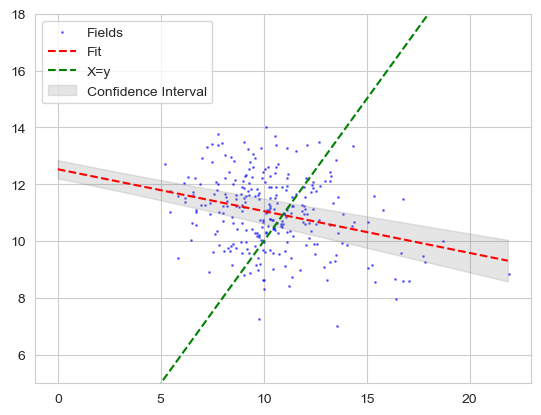

10.9

In [19]:
X, y = df_dt.Ref_as, df_dt.Num_s
popt, pcov = curve_fit(lin_func, X, y)
X_r = np.arange(0, max(X), 0.05)
fit_line = lin_func(X_r, *popt)
sigma = np.sqrt(np.diag(pcov)[0] * X_r ** 2 + np.diag(pcov)[1])
upper_bound = fit_line + sigma
lower_bound = fit_line - sigma

plt.scatter(X, y, label='Fields', color='blue', alpha=0.5, s=1)
plt.plot(X_r, fit_line, 'r--', label='Fit')
plt.plot(X_r, X_r, 'g--', label='X=y')
plt.fill_between(X_r, lower_bound, upper_bound, color='gray', alpha=0.2, label='Confidence Interval')

plt.ylim((5, 18))

plt.legend()
plt.show()

X_r[np.abs(fit_line - X_r).argmin()]

(array([18., 41., 82., 66., 40., 11.,  9.,  3.,  1.,  1.]),
 array([ 5.21925332,  6.88657518,  8.55389704, 10.2212189 , 11.88854076,
        13.55586262, 15.22318448, 16.89050634, 18.5578282 , 20.22515006,
        21.89247192]),
 <BarContainer object of 10 artists>)

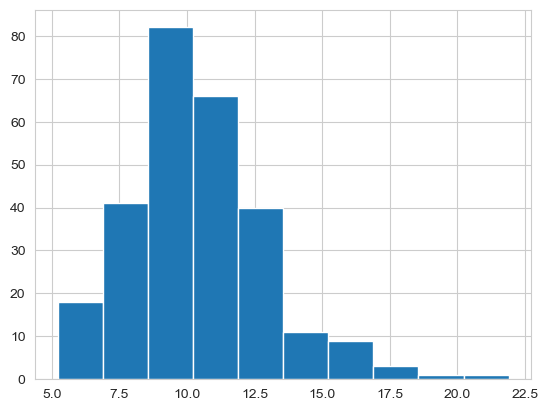

In [149]:
plt.hist(df_dt.Ref_as)

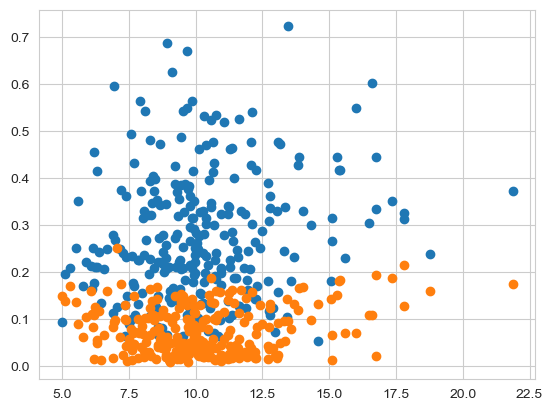

In [30]:
plt.scatter(df_dt.Ref_as, df_dt.Nk_val)
plt.scatter(df_dt.Ref_as, df_dt.Dval)

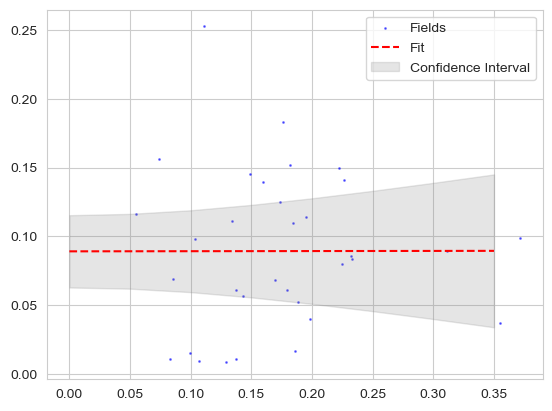

[0.00101308 0.08914854] [[ 0.01952942 -0.00338236]
 [-0.00338236  0.00068894]]
                            OLS Regression Results                            
Dep. Variable:                   Dval   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                 5.255e-05
Date:                Sun, 07 Apr 2024   Prob (F-statistic):              0.994
Time:                        15:42:46   Log-Likelihood:                 47.974
No. Observations:                  33   AIC:                            -91.95
Df Residuals:                      31   BIC:                            -88.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [163]:
df_op = df_dt[df_dt.Ref_as < 8]

X, y = df_op['Nk_val'], df_op['Dval']
popt, pcov = curve_fit(lin_func, X, y)
X_r = np.arange(0, max(X), 0.05)
fit_line = lin_func(X_r, *popt)
sigma = np.sqrt(np.diag(pcov)[0] * X_r ** 2 + np.diag(pcov)[1])
upper_bound = fit_line + sigma
lower_bound = fit_line - sigma

plt.scatter(X, y, label='Fields', color='blue', alpha=0.5, s=1)
plt.plot(X_r, fit_line, 'r--', label='Fit')
plt.fill_between(X_r, lower_bound, upper_bound, color='gray', alpha=0.2, label='Confidence Interval')

plt.legend()
plt.show()
print(popt, pcov)

y = df_op['Dval']
X_cols = ['Nk_val']
X = sm.add_constant(df_op[X_cols])
mediator_model = sm.OLS(y, X)

print(mediator_model.fit().summary())

In [164]:
df_op = df_dt[df_dt.Ref_as > 11.1]
pearsonr(df_op.Nk_val, df_op.Dval)

PearsonRResult(statistic=0.32344618649579665, pvalue=0.004646186968172227)

In [186]:
df_op = df_dt[df_dt.Ref_as < 7.5]
pearsonr(df_op.Nk_val, df_op.Dval)

PearsonRResult(statistic=-0.11325315064457561, pvalue=0.5982584112457043)

In [187]:
df_op = df_dt[df_dt.Ref_as > 11]
pearsonr(df_op.Nk_val, df_op.Dval)

PearsonRResult(statistic=0.32344618649579665, pvalue=0.004646186968172227)

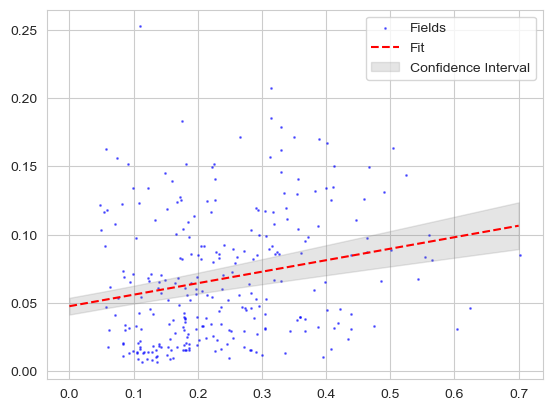

[0.08418496 0.04764234] [[ 5.21770826e-04 -1.24429305e-04]
 [-1.24429305e-04  3.76133963e-05]]
                            OLS Regression Results                            
Dep. Variable:                   Dval   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     13.58
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           0.000276
Time:                        15:32:02   Log-Likelihood:                 449.79
No. Observations:                 272   AIC:                            -895.6
Df Residuals:                     270   BIC:                            -888.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [141]:
df_op = df_dt[df_dt.Ref_as > 11]

X, y = df_op['Nk_val'], df_op['Dval']
popt, pcov = curve_fit(lin_func, X, y)
X_r = np.arange(0, max(X), 0.05)
fit_line = lin_func(X_r, *popt)
sigma = np.sqrt(np.diag(pcov)[0] * X_r ** 2 + np.diag(pcov)[1])
upper_bound = fit_line + sigma
lower_bound = fit_line - sigma

plt.scatter(X, y, label='Fields', color='blue', alpha=0.5, s=1)
plt.plot(X_r, fit_line, 'r--', label='Fit')
plt.fill_between(X_r, lower_bound, upper_bound, color='gray', alpha=0.2, label='Confidence Interval')

plt.legend()
plt.show()
print(popt, pcov)

y = df_op['Dval']
X_cols = ['Nk_val']
X = sm.add_constant(df_op[X_cols])
mediator_model = sm.OLS(y, X)

print(mediator_model.fit().summary())

In [136]:
df_op = df_dt[df_dt.Ref_as > 11.1]
y = df_op['Dval']
X_cols = ['Ref_as']
X = sm.add_constant(df_op[X_cols])
mediator_model = sm.OLS(y, X)

print(mediator_model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   Dval   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     30.65
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           3.38e-07
Time:                        15:26:01   Log-Likelihood:                 146.13
No. Observations:                  87   AIC:                            -288.3
Df Residuals:                      85   BIC:                            -283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1076      0.032     -3.338      0.0

In [127]:
df_op = df_dt[df_dt.Ref_as > 11.1]
y = df_op['Dval']
X_cols = ['Ref_as']
X = sm.add_constant(df_op[X_cols])
mediator_model = sm.OLS(y, X)

print(mediator_model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   Dval   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     30.65
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           3.38e-07
Time:                        15:12:13   Log-Likelihood:                 146.13
No. Observations:                  87   AIC:                            -288.3
Df Residuals:                      85   BIC:                            -283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1076      0.032     -3.338      0.0

In [128]:
df_op = df_dt
y = df_op['Dval']
X_cols = ['Ref_as']
X = sm.add_constant(df_op[X_cols])
mediator_model = sm.OLS(y, X)

print(mediator_model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   Dval   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.272
Date:                Sun, 07 Apr 2024   Prob (F-statistic):              0.260
Time:                        15:12:24   Log-Likelihood:                 443.75
No. Observations:                 272   AIC:                            -883.5
Df Residuals:                     270   BIC:                            -876.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0542      0.012      4.397      0.0

In [129]:
df_op = df_dt[df_dt['Ref_as'] > 11.11]
y = df_op['Dval']
X_cols = ['Ref_as']
X = sm.add_constant(df_op[X_cols])
mediator_model = sm.OLS(y, X)

print(mediator_model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   Dval   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     30.65
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           3.38e-07
Time:                        15:12:28   Log-Likelihood:                 146.13
No. Observations:                  87   AIC:                            -288.3
Df Residuals:                      85   BIC:                            -283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1076      0.032     -3.338      0.0

In [130]:
xv, mv, yv = 'Dval', 'Nk_val', 'Ref_as'
y = df_dt[mv]
X_cols = [xv]
X = sm.add_constant(df_dt[X_cols])
mediator_model = sm.OLS(y, X)

# For the second step of the mediation model, we can add in other predictors.
y = df_dt[yv]
X_cols = [xv, mv]
X = sm.add_constant(df_dt[X_cols])
outcome_model = sm.OLS(y, X)

med = Mediation(outcome_model=outcome_model, mediator_model=mediator_model,
                exposure=xv, mediator=mv).fit()
print("General Distribution: Structure(Exposure)-Context(Mediator)-Function(y)\n")
print(med.summary())

General Distribution: Structure(Exposure)-Context(Mediator)-Function(y)

                          Estimate  Lower CI bound  Upper CI bound  P-value
ACME (control)            2.147420        0.539880        4.169901    0.002
ACME (treated)            2.147420        0.539880        4.169901    0.002
ADE (control)             1.440937       -4.795024        7.388435    0.658
ADE (treated)             1.440937       -4.795024        7.388435    0.658
Total effect              3.588356       -2.270060        9.834194    0.256
Prop. mediated (control)  0.441904       -5.328506        6.062142    0.258
Prop. mediated (treated)  0.441904       -5.328506        6.062142    0.258
ACME (average)            2.147420        0.539880        4.169901    0.002
ADE (average)             1.440937       -4.795024        7.388435    0.658
Prop. mediated (average)  0.441904       -5.328506        6.062142    0.258


In [105]:
df_dt.columns

Index(['Name', 'Ref_as', 'Dval', 'Nk_val', 'D_N_s', 'Num_s'], dtype='object')

In [ ]:
'Ref_as', 'Num_s', 'Dval'
'Num_s', 'Ref_as', 'Dval'
'Dval', 'Num_s', 'Ref_as'

In [131]:
xv, mv, yv = 'Dval', 'Num_s', 'Ref_as'
y = df_dt[mv]
X_cols = [xv]
X = sm.add_constant(df_dt[X_cols])
mediator_model = sm.OLS(y, X)

# For the second step of the mediation model, we can add in other predictors.
y = df_dt[yv]
X_cols = [xv, mv]
X = sm.add_constant(df_dt[X_cols])
outcome_model = sm.OLS(y, X)

med = Mediation(outcome_model=outcome_model, mediator_model=mediator_model,
                exposure=xv, mediator=mv).fit()
print("General Distribution: Structure(Exposure)-Context(Mediator)-Function(y)\n")
print(med.summary())

General Distribution: Structure(Exposure)-Context(Mediator)-Function(y)

                          Estimate  Lower CI bound  Upper CI bound  P-value
ACME (control)            5.774341        3.093931        8.832965     0.00
ACME (treated)            5.774341        3.093931        8.832965     0.00
ADE (control)            -2.185499       -8.523455        4.596222     0.51
ADE (treated)            -2.185499       -8.523455        4.596222     0.51
Total effect              3.588842       -2.640450        9.970519     0.27
Prop. mediated (control)  1.242446      -14.828678       16.664154     0.27
Prop. mediated (treated)  1.242446      -14.828678       16.664154     0.27
ACME (average)            5.774341        3.093931        8.832965     0.00
ADE (average)            -2.185499       -8.523455        4.596222     0.51
Prop. mediated (average)  1.242446      -14.828678       16.664154     0.27


In [95]:
xv, mv, yv = 'Dval', 'Nk_val', 'Ref_as'
y = df_dt[mv]
X_cols = [xv]
X = sm.add_constant(df_dt[X_cols])
mediator_model = sm.OLS(y, X)

# For the second step of the mediation model, we can add in other predictors.
y = df_dt[yv]
X_cols = [xv, mv]
X = sm.add_constant(df_dt[X_cols])
outcome_model = sm.OLS(y, X)

med = Mediation(outcome_model=outcome_model, mediator_model=mediator_model,
                exposure=xv, mediator=mv).fit()
print("General Distribution: Structure(Exposure)-Context(Mediator)-Function(y)\n")
print(med.summary())

General Distribution: Structure(Exposure)-Context(Mediator)-Function(y)

                          Estimate  Lower CI bound  Upper CI bound  P-value
ACME (control)            2.265503        0.344998        4.860588    0.020
ACME (treated)            2.265503        0.344998        4.860588    0.020
ADE (control)             1.437793       -5.418684        7.844551    0.658
ADE (treated)             1.437793       -5.418684        7.844551    0.658
Total effect              3.703296       -3.477461       10.611829    0.312
Prop. mediated (control)  0.440285       -5.984732        4.106760    0.320
Prop. mediated (treated)  0.440285       -5.984732        4.106760    0.320
ACME (average)            2.265503        0.344998        4.860588    0.020
ADE (average)             1.437793       -5.418684        7.844551    0.658
Prop. mediated (average)  0.440285       -5.984732        4.106760    0.320


In [90]:
k = 2.79
X_l = 0
y_l = 0
int_s = []
for i in np.arange(5, 18, k):

    if i == np.arange(5, 18, k)[-1]:
        break

    df_op = df_dt[(df_dt['Ref_as'] >= i - 0.75) & (df_dt['Ref_as'] <= i + k + 0.75)]
    if len(df_op) < 10:
        continue
    X, y = df_op.Ref_as, df_op.D_N_s
    popt, pcov = curve_fit(lin_func, X, y)
    X_r = np.arange(min(X), max(X), 0.05)
    fit_line = lin_func(X_r, *popt)
    if i == 5:
        X_l = X_r
        y_l = fit_line
        int_s.append(X_r[0])
    else:
        min_p = 10
        X_i = 0
        for m in range(len(X_l)):
            for n in range(len((X_r))):
                if np.abs((X_l[m] - X_r[n]) * (y_l[m] - fit_line[n])) < min_p:
                    min_p = np.abs((X_l[m] - X_r[n]) * (y_l[m] - fit_line[n]))
                    X_i = X_l[m]
        int_s.append(X_i)
        X_l = X_r
        y_l = fit_line

df_op = df_dt[df_dt['Ref_as'] >= i - 0.5]
X, y = df_op.Ref_as, df_op.D_N_s

popt, pcov = curve_fit(lin_func, X, y)
X_r = np.arange(min(X), max(X), 0.05)
fit_line = lin_func(X_r, *popt)
min_p = 10
X_i = 0
for m in range(len(X_l)):
    for n in range(len((X_r))):
        if np.abs((X_l[m] - X_r[n]) * (y_l[m] - fit_line[n])) < min_p:
            min_p = np.abs((X_l[m] - X_r[n]) * (y_l[m] - fit_line[n]))
            X_i = X_l[m]
int_s.append(X_i)

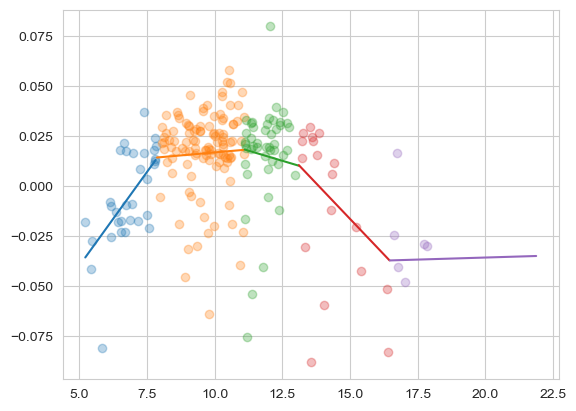

In [14]:
n = 0
k = 2.79
for i in np.arange(5, 18, k):
    if n == len(int_s) - 1:
        break

    df_op = df_dt[(df_dt['Ref_as'] >= i - 0.75) & (df_dt['Ref_as'] <= i + k + 0.75)]
    if len(df_op) < 10:
        continue
    X, y = df_op.Ref_as, df_op.D_N_s
    popt, pcov = curve_fit(lin_func, X, y)
    min_x = int_s[n]
    max_x = int_s[n + 1]
    X_r = np.arange(min_x, max_x, 0.05)
    fit_line = lin_func(X_r, *popt)
    sigma = np.sqrt(np.diag(pcov)[0] * X_r ** 2 + np.diag(pcov)[1])
    upper_bound = fit_line + sigma
    lower_bound = fit_line - sigma
    df_op = df_dt[(df_dt['Ref_as'] >= min_x) & (df_dt['Ref_as'] < max_x)]
    X, y = df_op.Ref_as, df_op.D_N_s
    plt.scatter(X, y, alpha=0.3)
    plt.plot(X_r, fit_line, label='Fit')
    n += 1

df_op = df_dt[df_dt['Ref_as'] > i - 0.5]
X, y = df_op.Ref_as, df_op.D_N_s
popt, pcov = curve_fit(lin_func, X, y)
min_x = int_s[-1]
max_x = df_op.Ref_as.max()
X_r = np.arange(min_x, max_x, 0.05)
fit_line = lin_func(X_r, *popt)
sigma = np.sqrt(np.diag(pcov)[0] * X_r ** 2 + np.diag(pcov)[1])
upper_bound = fit_line + sigma
lower_bound = fit_line - sigma
df_op = df_dt[(df_dt['Ref_as'] >= min_x) & (df_dt['Ref_as'] < max_x)]
X, y = df_op.Ref_as, df_op.D_N_s
plt.scatter(X, y, alpha=0.3)
plt.plot(X_r, fit_line, label='Fit')
n += 1

plt.show()

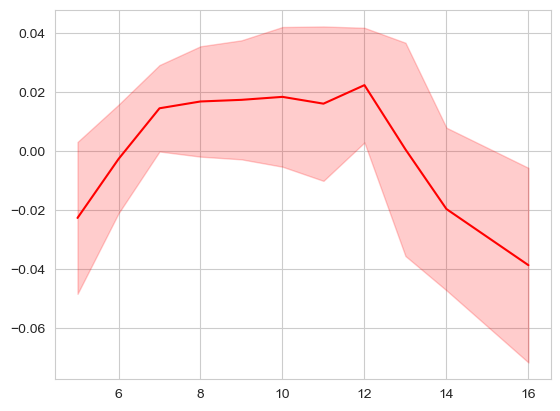

In [16]:
X = []
y = []
u_bond = []
l_bond = []
for i in np.arange(5, 21, 1):

    df_op = df_dt[(df_dt['Ref_as'] >= i) & (df_dt['Ref_as'] < i + 1.5)]
    if len(df_op) < 5:
        continue

    X.append(i)
    y.append(df_op['D_N_s'].mean())
    u_bond.append(df_op['D_N_s'].mean() + df_op['D_N_s'].std())
    l_bond.append(df_op['D_N_s'].mean() - df_op['D_N_s'].std())

plt.plot(X, y, color='r')
plt.fill_between(X, u_bond, l_bond, color='r', alpha=0.2)



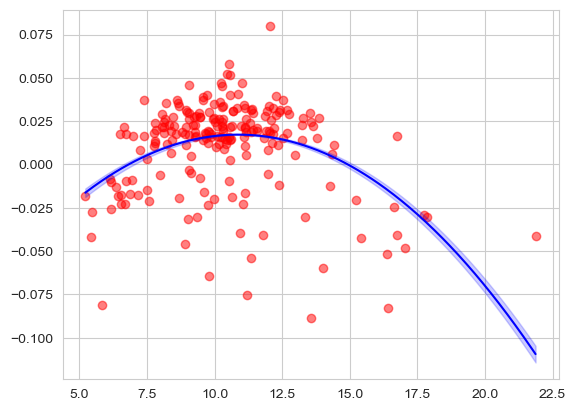

[-1.04802247e-03  1.08745614e+01  1.72391320e-02] [[ 2.05575281e-08 -1.21234400e-05 -1.49199849e-07]
 [-1.21234400e-05  1.03910516e-01  1.94199329e-04]
 [-1.49199849e-07  1.94199329e-04  3.89296684e-06]]


In [115]:
X, y = df_dt.Ref_as, df_dt.D_N_s
popt, pcov = curve_fit(quadratic, X, y)
X_r = np.arange(min(X), max(X), 0.05)
fit_line = quadratic(X_r, *popt)
upper_bound = fit_line.copy()
lower_bound = fit_line.copy()
for i in np.linspace(0, pcov[1, 1], num=50):
    popt_h = popt.copy()
    popt_h[1] += 2 * i
    fit_line_d = quadratic(X_r, *popt_h)

    upper_bound = np.max(np.array([upper_bound, fit_line_d]), axis=0)
    lower_bound = np.min(np.array([lower_bound, fit_line_d]), axis=0)

    popt_l = popt.copy()
    popt_l[1] -= 2 * i
    fit_line_d = quadratic(X_r, *popt_l)

    upper_bound = np.max(np.array([upper_bound, fit_line_d]), axis=0)
    lower_bound = np.min(np.array([lower_bound, fit_line_d]), axis=0)

plt.scatter(X, y, color='red', alpha=0.5)
plt.plot(X_r, fit_line, label='Fit', color='b')
plt.fill_between(X_r, lower_bound, upper_bound, color='b', alpha=0.2)
#plt.xlim((int_s[0],int_s[-1]))

plt.show()
print(popt, pcov)

In [19]:
y.max(), y.min()

(14.005338041346155, 6.999422467507961)

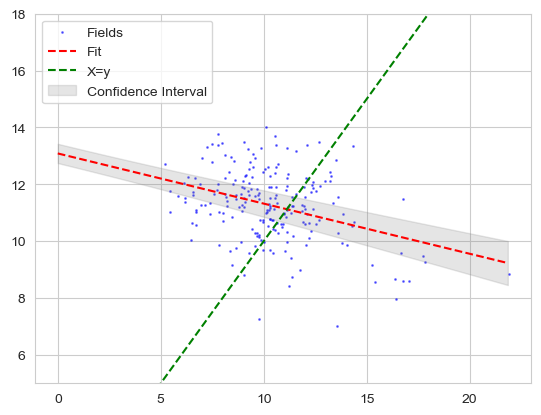

11.100000000000001

In [108]:
X, y = Ref_as, np.array(Num_s)
popt, pcov = curve_fit(lin_func, X, y)
X_r = np.arange(0, max(X), 0.05)
fit_line = lin_func(X_r, *popt)
sigma = np.sqrt(np.diag(pcov)[0] * X_r ** 2 + np.diag(pcov)[1])
upper_bound = fit_line + sigma
lower_bound = fit_line - sigma

plt.scatter(X, y, label='Fields', color='blue', alpha=0.5, s=1)
plt.plot(X_r, fit_line, 'r--', label='Fit')
plt.plot(X_r, X_r, 'g--', label='X=y')
plt.fill_between(X_r, lower_bound, upper_bound, color='gray', alpha=0.2, label='Confidence Interval')

plt.ylim((5, 18))

plt.legend()
plt.show()

X_r[np.abs(fit_line - X_r).argmin()]